In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df= pd.read_csv('final_vuelo.csv')
df

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime,DEST,Condition,DELAY_STATUS
0,0.622243,0.499202,-0.847784,-0.710402,-1.654133,-1.340285,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.001041,-0.875884,CHS,Fair / Windy,0
1,0.622243,0.499202,1.219484,1.357427,-1.621436,-1.099959,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-0.855057,-0.875884,LAX,Fair / Windy,0
2,0.622243,0.499202,-0.370722,-0.223523,-1.595279,-1.241838,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,0.166829,-0.875884,FLL,Fair / Windy,1
3,0.622243,0.499202,-0.479526,-0.364077,-1.588739,-1.152078,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.293008,-0.875884,MCO,Fair / Windy,0
4,0.622243,0.499202,-0.722242,-0.570972,-1.546233,-1.192615,0.560651,0.128137,0.011385,1.858498,2.478788,-0.615933,-2.322987,-1.383478,-1.147024,-0.875884,ATL,Fair / Windy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,-1.381086,0.499202,-1.408541,-1.256875,1.775772,1.494401,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.166328,0.431822,-0.271122,-1.425826,ORH,Cloudy,1
28814,-1.381086,0.499202,-1.257890,-1.215271,1.841166,-2.565078,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.166829,-1.425826,BOS,Cloudy,1
28815,-1.381086,0.499202,1.395244,1.297832,1.893481,1.233806,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.020845,-1.425826,SEA,Cloudy,1
28816,-1.381086,0.499202,-0.010833,0.371301,1.939257,-1.881742,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,-1.147024,-1.425826,SJU,Cloudy,1


In [4]:
columnas_drop =[ 'DEST' , 'Condition']

In [5]:
 df = df.drop(columnas_drop, axis=1)

In [6]:
df

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime,DELAY_STATUS
0,0.622243,0.499202,-0.847784,-0.710402,-1.654133,-1.340285,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.001041,-0.875884,0
1,0.622243,0.499202,1.219484,1.357427,-1.621436,-1.099959,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-0.855057,-0.875884,0
2,0.622243,0.499202,-0.370722,-0.223523,-1.595279,-1.241838,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,0.166829,-0.875884,1
3,0.622243,0.499202,-0.479526,-0.364077,-1.588739,-1.152078,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.293008,-0.875884,0
4,0.622243,0.499202,-0.722242,-0.570972,-1.546233,-1.192615,0.560651,0.128137,0.011385,1.858498,2.478788,-0.615933,-2.322987,-1.383478,-1.147024,-0.875884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,-1.381086,0.499202,-1.408541,-1.256875,1.775772,1.494401,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.166328,0.431822,-0.271122,-1.425826,1
28814,-1.381086,0.499202,-1.257890,-1.215271,1.841166,-2.565078,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.166829,-1.425826,1
28815,-1.381086,0.499202,1.395244,1.297832,1.893481,1.233806,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.020845,-1.425826,1
28816,-1.381086,0.499202,-0.010833,0.371301,1.939257,-1.881742,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,-1.147024,-1.425826,1


# MODELO KNN 

In [ ]:
## utilizare todas mis columnas menos la target.

In [9]:
X = df.drop(columns=['DELAY_STATUS']) 
y= df['DELAY_STATUS']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [11]:
X.shape, y.shape

((28818, 16), (28818,))

In [12]:
X_train.shape, X_test.shape

((21613, 16), (7205, 16))

In [13]:
model =  KNeighborsClassifier(n_neighbors=13)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

### Modelo de Prediccion train

In [14]:
predictions_train = model.predict(X_train)
predictions_train

array([1, 1, 0, ..., 0, 0, 0])

In [15]:
score_train = model.score(X_train, y_train)
score_train

0.7266460000925369

### Test

In [26]:
predictions_test = model.predict(X_test)
score_test = model.score(X_test , y_test)

In [27]:
score_test

0.6918806384455239

In [ ]:
## el ajuste es muy bueno con los datos que tenemos.

In [28]:
scores = []
for k in range(6,21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [29]:
scores

[0.6911866759195003,
 0.6742539902845246,
 0.6896599583622485,
 0.6810548230395559,
 0.6931297709923664,
 0.6888272033310201,
 0.6961832061068702,
 0.6911866759195003,
 0.6945176960444136,
 0.6924358084663428,
 0.69382373351839,
 0.6906315058986815,
 0.6942401110340042,
 0.6911866759195003,
 0.6918806384455239]

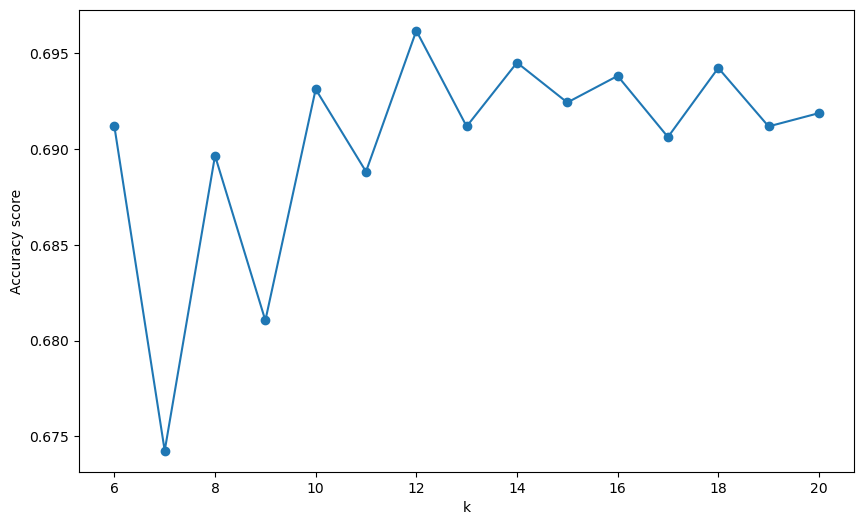

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

In [21]:
# Elbow method using MSE as error metric (lower MSE -> better model)

from sklearn.metrics import mean_squared_error

MSEs = []

for k in range(6,21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [22]:
MSEs

[0.30881332408049966,
 0.32574600971547535,
 0.3103400416377516,
 0.3189451769604441,
 0.3068702290076336,
 0.3111727966689799,
 0.30381679389312977,
 0.30881332408049966,
 0.3054823039555864,
 0.30756419153365716,
 0.30617626648161,
 0.3093684941013185,
 0.3057598889659958,
 0.30881332408049966,
 0.30811936155447606]

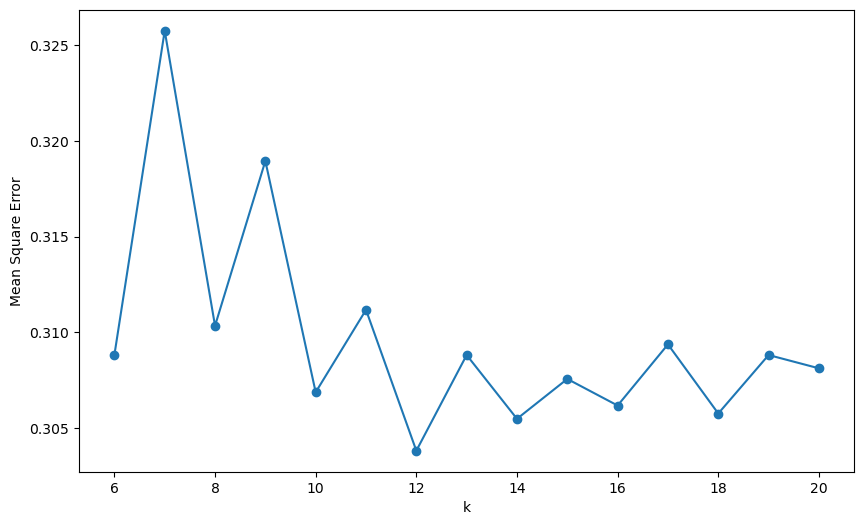

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
plt.show()

### DAY OF WEEK , DISTANCE , CLIME

In [31]:
columnas_x =[ 'DAY_OF_WEEK' , 'DISTANCE' , 'clime']

In [32]:
X = df[columnas_x]

In [34]:
y = df['DELAY_STATUS']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [36]:
X.shape, y.shape

((28818, 3), (28818,))

In [37]:
X_train.shape, X_test.shape

((21613, 3), (7205, 3))

In [46]:
model =  KNeighborsClassifier(n_neighbors=16)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

### Modelo de Prediccion train

In [47]:
predictions_train = model.predict(X_train)
predictions_train

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
score_train = model.score(X_train, y_train)
score_train

0.6910655623930042

### Test

In [49]:
predictions_test = model.predict(X_test)
score_test = model.score(X_test , y_test)

In [50]:
score_test

0.6741151977793199

In [51]:
scores = []
for k in range(6,21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [52]:
scores

[0.6605135322692575,
 0.6383067314365024,
 0.6575988896599584,
 0.6482997918112422,
 0.6619014573213047,
 0.6544066620402498,
 0.6650936849410132,
 0.6578764746703678,
 0.6695350451075642,
 0.6653712699514226,
 0.6741151977793199,
 0.6682859125607217,
 0.6730048577376821,
 0.6663428174878556,
 0.6723108952116585]

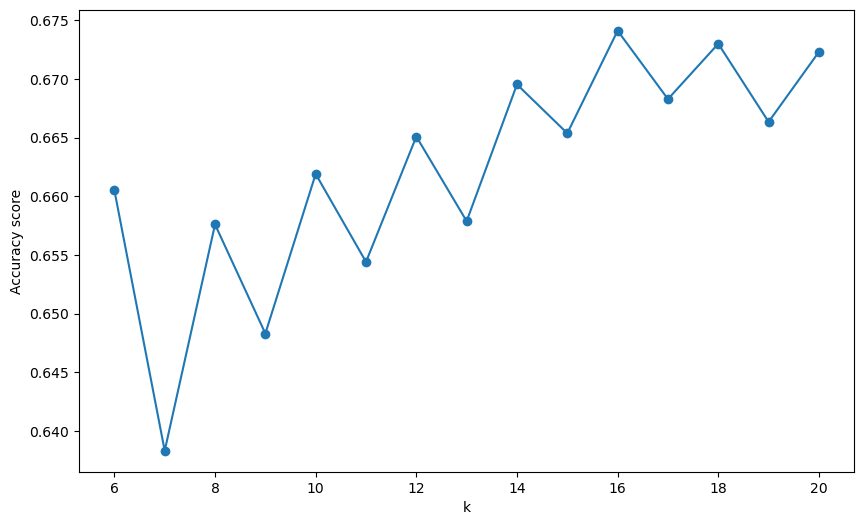

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

## MONTH, DAY OF WEEK , Wind Speed, Pressure

In [56]:
columnas_x =[ 'MONTH','DAY_OF_WEEK' , 'Wind Speed', 'Pressure' ]

In [57]:
X = df[columnas_x]

In [58]:
y = df['DELAY_STATUS']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [60]:
X.shape, y.shape

((28818, 4), (28818,))

In [61]:
X_train.shape, X_test.shape

((21613, 4), (7205, 4))

In [62]:
model =  KNeighborsClassifier(n_neighbors=13)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [63]:
predictions_train = model.predict(X_train)
predictions_train

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
score_train = model.score(X_train, y_train)
score_train

0.7117012908897423

### Test

In [65]:
predictions_test = model.predict(X_test)
score_test = model.score(X_test , y_test)

In [66]:
score_test

0.6841082581540597

In [67]:
scores = []
for k in range(6,21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [68]:
scores

[0.6767522553782096,
 0.6695350451075642,
 0.6845246356696738,
 0.6739764052741152,
 0.6845246356696738,
 0.6803608605135323,
 0.6891047883414295,
 0.6841082581540597,
 0.6916030534351145,
 0.6889659958362249,
 0.6949340735600278,
 0.6899375433726579,
 0.6942401110340042,
 0.6907702984038862,
 0.6946564885496184]

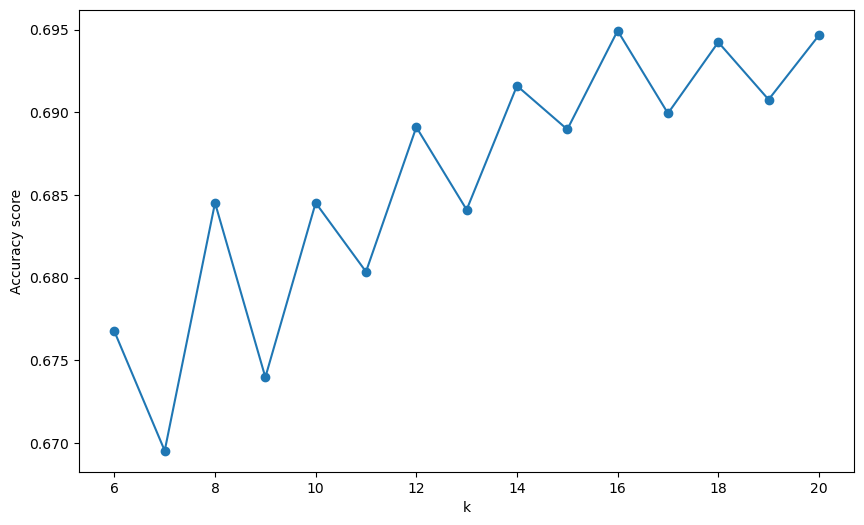

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

In [70]:
# Elbow method using MSE as error metric (lower MSE -> better model)

from sklearn.metrics import mean_squared_error

MSEs = []

for k in range(6,21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [71]:
MSEs

[0.3232477446217904,
 0.3304649548924358,
 0.31547536433032614,
 0.3260235947258848,
 0.31547536433032614,
 0.3196391394864677,
 0.3108952116585704,
 0.3158917418459403,
 0.3083969465648855,
 0.31103400416377514,
 0.30506592643997227,
 0.3100624566273421,
 0.3057598889659958,
 0.3092297015961138,
 0.3053435114503817]

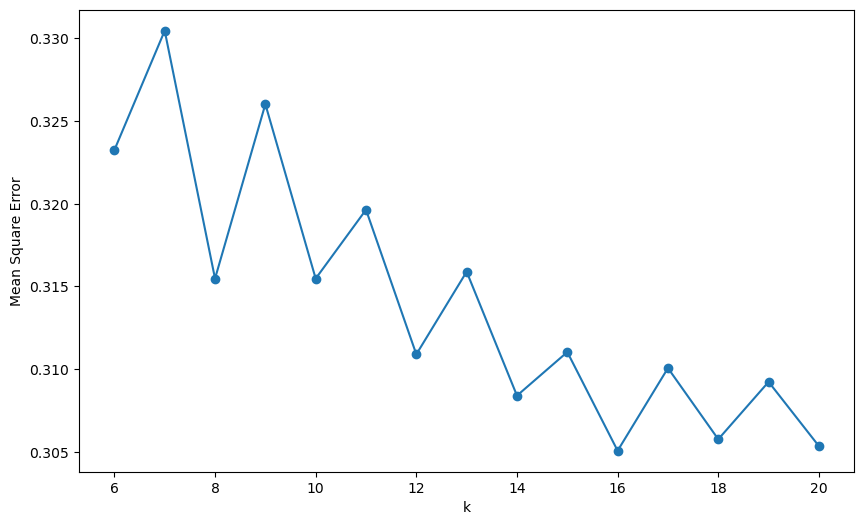

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
plt.show()

## -Weather conditions (Temperature, Dew Point, Humidity, Wind Speed, Wind Gust, Pressure, Clime).
## - DEP_TIME_M
## - Date of the flight (month, day of the week).

In [73]:
columnas_x =[ 'MONTH','DAY_OF_WEEK' ,'DEP_TIME_M' ,  'Wind Speed', 'Pressure' , 'clime', 'Dew Point',	
             'Humidity',	'Wind Gust' , 'Temperature' ]

In [74]:
X = df[columnas_x]

In [75]:
y = df['DELAY_STATUS']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [77]:
X_train.shape , X_test.shape

((21613, 10), (7205, 10))

In [78]:
model =  KNeighborsClassifier(n_neighbors=13)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

### Modelo de Prediccion train

In [79]:
predictions_train = model.predict(X_train)
predictions_train

array([0, 1, 0, ..., 0, 0, 0])

In [80]:
score_train = model.score(X_train, y_train)
score_train

0.725581825753019

### Test

In [81]:
predictions_test = model.predict(X_test)
score_test = model.score(X_test , y_test)

In [82]:
score_test

0.6786953504510757

In [83]:
scores = []
for k in range(6,21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [84]:
scores

[0.6807772380291465,
 0.673560027758501,
 0.684941013185288,
 0.6767522553782096,
 0.6882720333102013,
 0.6775850104094379,
 0.6896599583622485,
 0.6786953504510757,
 0.6888272033310201,
 0.6831367106176266,
 0.6931297709923664,
 0.689382373351839,
 0.6932685634975712,
 0.6879944482997918,
 0.6924358084663428]

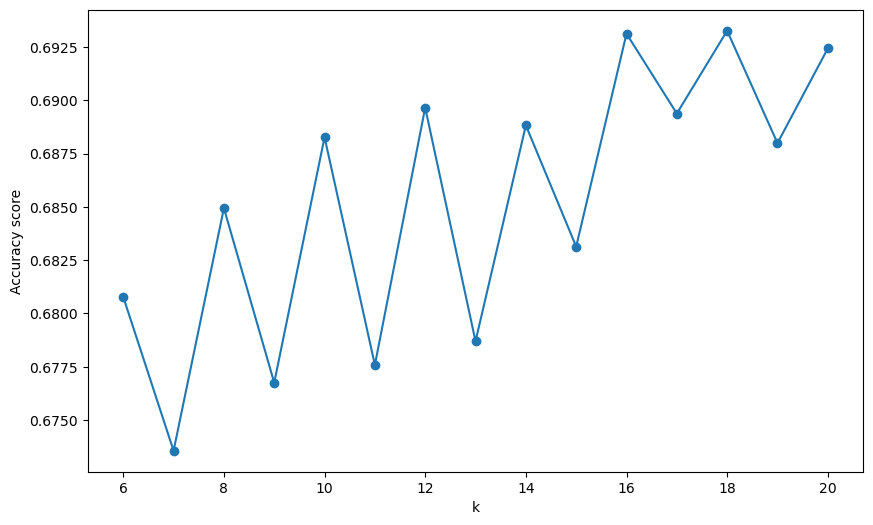

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()